# This has been adapted from lesson2-download of fastai-v3 course by Jeremy Howard
It does all the training Google Colab



In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.vision import *
from fastai import *

In [0]:
root_dir = '/content/drive/My Drive/fastai-v3/lesson2/'
path = Path(root_dir)
path.ls()

[PosixPath('/content/drive/My Drive/fastai-v3/lesson2/lesson2-download.ipynb'),
 PosixPath('/content/drive/My Drive/fastai-v3/lesson2/f1cars'),
 PosixPath('/content/drive/My Drive/fastai-v3/lesson2/lesson2-download-cln.ipynb'),
 PosixPath('/content/drive/My Drive/fastai-v3/lesson2/models')]

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

ferrari eample shown below - repeat for other classes

In [0]:
folder = 'ferrari' #'black'
file = 'urls_ferrari_50.csv'#'urls_black.csv'
path = Path(root_dir, 'f1cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=50, max_workers=0)

You will need to run this cell once per each category.

In [0]:

path.ls()

[PosixPath('/content/drive/My Drive/fastai-v3/lesson2/f1cars'),
 PosixPath('/content/drive/My Drive/fastai-v3/lesson2/lesson2-download-cln.ipynb'),
 PosixPath('/content/drive/My Drive/fastai-v3/lesson2/models'),
 PosixPath('/content/drive/My Drive/fastai-v3/lesson2/lesson2-download.ipynb')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['ferrari','mercedes','redbull','mclaren','racingpoint',
           'renault', 'williams','tororosso', 'haas', 'sauber']

In [0]:
#note path is Path(root_dir) at the top - ignore the individual ones just above
#here

path=Path(root_dir)
for item in  classes:
  loc_dir = (path/'f1cars'/item)
  list1=[]
  list1 = os.listdir(loc_dir)  
  print(len(list1) , ' images in ', item)

108  images in  ferrari
102  images in  mercedes
118  images in  redbull
117  images in  mclaren
83  images in  racingpoint
95  images in  renault
120  images in  williams
98  images in  tororosso
123  images in  haas
108  images in  sauber


In [0]:
merc_list = (path/'f1cars/mercedes').ls()
print(type(merc_list))
print(len(merc_list))
print(merc_list[10])

<class 'list'>
102
/content/drive/My Drive/fastai-v3/lesson2/f1cars/mercedes/00000007.jpg


In [0]:
il = ImageList.from_folder(path/'f1cars/mercedes');il


ImageList (102 items)
Image (3, 183, 275),Image (3, 183, 275),Image (3, 177, 284),Image (3, 168, 299),Image (3, 146, 345)
Path: /content/drive/My Drive/fastai-v3/lesson2/f1cars/mercedes

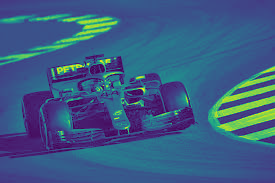

In [0]:
il.convert_mode='L'
il.open(il.items[1])

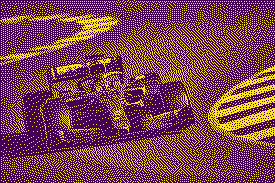

In [0]:
mode = '1'
open_image(il.items[1], convert_mode=mode)

torch.Size([3, 183, 275])


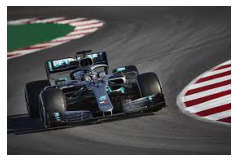

In [0]:
img = open_image(merc_list[1]);print(img.shape)
img.show(figsize=(4,4))

Then we can remove any images that can't be opened:

In [0]:
path = path/'f1cars'

In [0]:
#remove items that are not images
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ferrari


mercedes


redbull


mclaren


racingpoint


renault


williams


tororosso


haas


sauber


In [0]:
import os
os.chdir(path)

In [0]:
#ADDITIONAL AUG DOESN'T WORK
additional_aug = [*zoom_crop(scale=(0.75,1.25),do_rand=True)]

tfms = get_transforms(do_flip=True, flip_vert=False,
                      max_rotate=20, max_zoom=1.3,
                      max_lighting=0.4, max_warp=0.4,
                      p_affine=0.75, p_lighting=0.75,
                      xtra_tfms=additional_aug)



## View data

In [0]:
#See IMAGE_AUGMENTATION tests notebook in MBP:fastai

#tfms = get_transforms(do_flip=True, flip_vert=False,
#                      max_rotate=20, max_zoom=1.3,
#                      max_lighting=0.4, max_warp=0.2,
#                      p_affine=0.75, p_lighting=0.75)


In [0]:
np.random.seed(42)
#dont have train/val/test so create valid set 10%

data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, 
        size=224, 
        bs=32).normalize(imagenet_stats)

In [0]:
print(len(data.train_ds))
print(len(data.valid_ds))

858
214


Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['ferrari',
 'haas',
 'mclaren',
 'mercedes',
 'racingpoint',
 'redbull',
 'renault',
 'sauber',
 'tororosso',
 'williams']

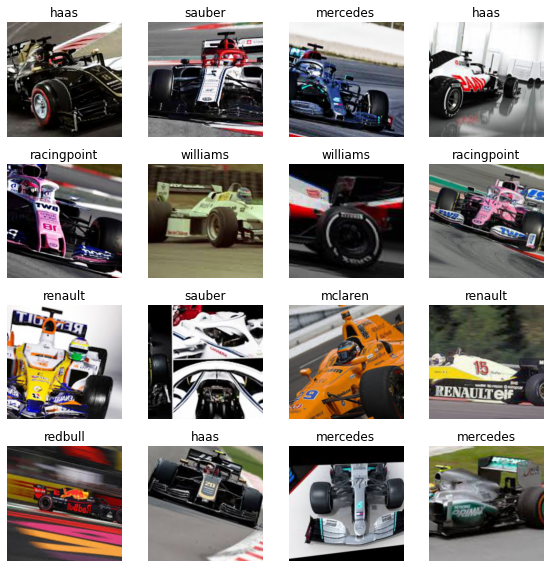

In [0]:
#check sample images
data.show_batch(rows=4, figsize=(8,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)
#classes train val

(['ferrari',
  'haas',
  'mclaren',
  'mercedes',
  'racingpoint',
  'redbull',
  'renault',
  'sauber',
  'tororosso',
  'williams'],
 10,
 858,
 214)

## Train model

In [0]:
learn=None
gc.collect()

30648

In [0]:
learn=None
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
#load saved weights .pth files

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.959231,1.375547,0.415888,05:46
1,2.154213,1.313326,0.336449,00:22
2,1.865205,1.156560,0.308411,00:18
3,1.631449,0.956499,0.275701,00:18
4,1.345894,0.840633,0.238318,00:18
5,1.121622,0.750248,0.210280,00:18
6,0.990754,0.731409,0.233645,00:18
7,0.847145,0.694425,0.205607,00:17
8,0.780356,0.672197,0.214953,00:17
9,0.707092,0.662063,0.205607,00:18


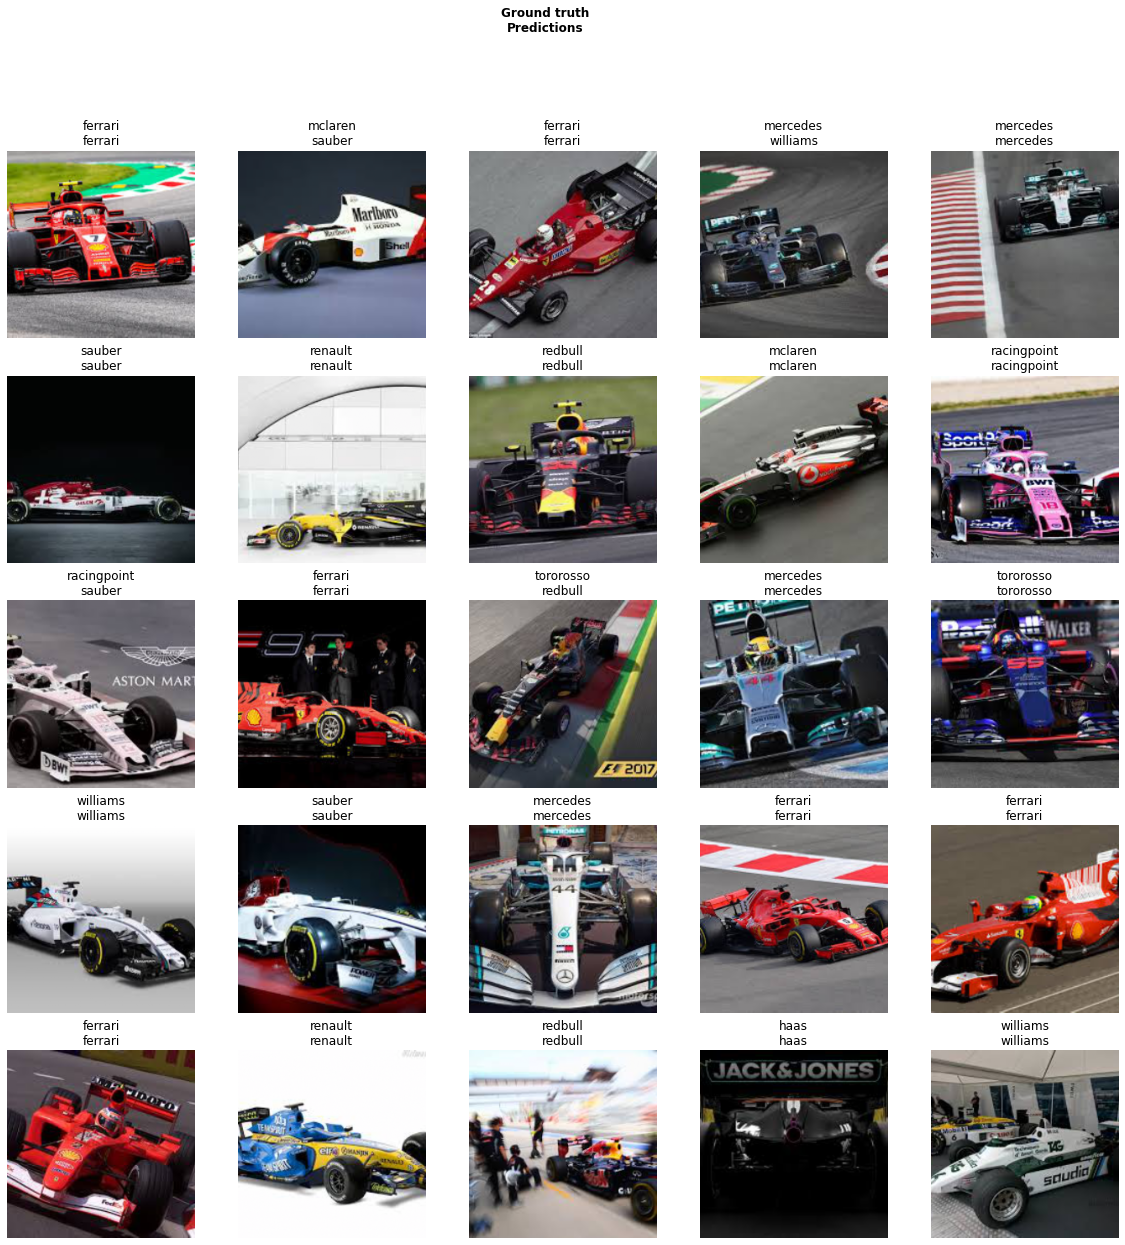

In [0]:
learn.show_results()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


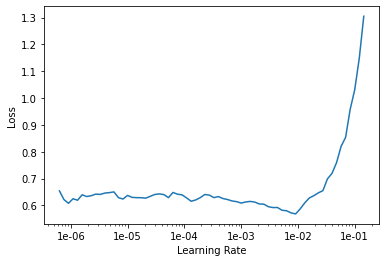

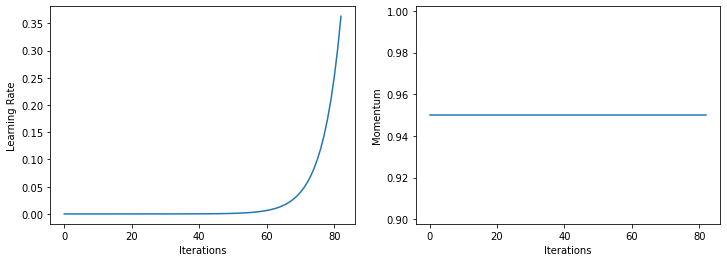

In [0]:
learn.recorder.plot();learn.recorder.plot_lr(show_moms=True)

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10,max_lr=slice(1e-4,1e-2/3))

epoch,train_loss,valid_loss,error_rate,time
0,0.684502,0.842444,0.196262,00:24
1,0.773211,2.049133,0.285047,00:22
2,0.988073,1.881425,0.369159,00:22
3,0.966221,1.493099,0.420561,00:22
4,0.888643,0.901254,0.257009,00:22
5,0.762199,0.736773,0.182243,00:22
6,0.652209,0.575698,0.149533,00:22
7,0.524840,0.600276,0.177570,00:22
8,0.417736,0.538878,0.135514,00:22
9,0.336752,0.547683,0.126168,00:22


In [0]:
learn.save('22Apr-stage-1')
learn.load('22Apr-stage-1')

In [0]:
learn.lr_find(stop_div=True, num_it=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


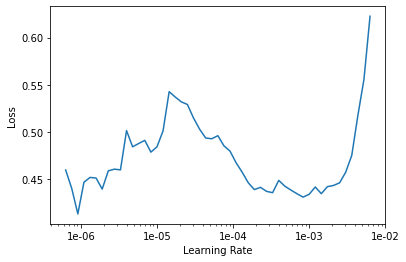

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10,max_lr= 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.458756,0.502722,0.144860,00:22
1,0.412928,0.496785,0.154206,00:22
2,0.368780,0.464216,0.140187,00:21
3,0.355202,0.520136,0.149533,00:21
4,0.314226,0.457497,0.121495,00:21
5,0.287149,0.469996,0.112150,00:21
6,0.251121,0.461140,0.121495,00:21
7,0.225490,0.464690,0.126168,00:21
8,0.206790,0.436719,0.116822,00:21
9,0.199323,0.447695,0.121495,00:21


In [0]:
learn.save('22Apr-stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

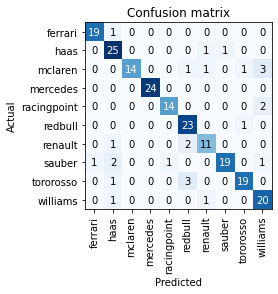

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.lr_find(stop_div=True,num_it=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


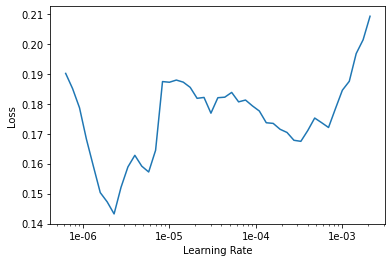

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-3),moms=(0.95,0.90))

epoch,train_loss,valid_loss,error_rate,time
0,0.092465,0.473225,0.140187,00:22
1,0.098201,0.491838,0.116822,00:21
2,0.128503,0.531472,0.135514,00:21
3,0.143103,0.721948,0.172897,00:21
4,0.143890,0.511580,0.121495,00:21
5,0.135486,0.573340,0.126168,00:21
6,0.116163,0.527524,0.116822,00:21
7,0.121938,0.509036,0.116822,00:21
8,0.111471,0.514438,0.112150,00:21
9,0.103053,0.508257,0.107477,00:21


In [0]:
learn.save('22Apr-stage-3')

In [0]:
learn.lr_find(stop_div=True, num_it=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


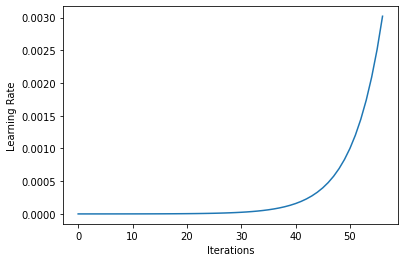

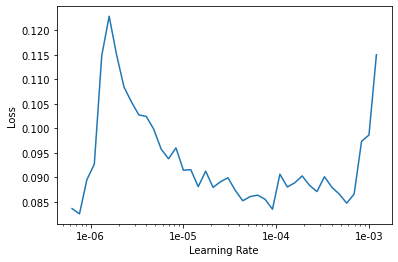

In [0]:
learn.recorder.plot_lr();learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-4),moms=(0.95,0.90))

epoch,train_loss,valid_loss,error_rate,time
0,0.097341,0.504350,0.116822,00:22
1,0.093585,0.486460,0.112150,00:21
2,0.087773,0.491482,0.116822,00:21
3,0.084628,0.477738,0.107477,00:21
4,0.067631,0.484322,0.098131,00:21
5,0.063730,0.488789,0.102804,00:21
6,0.063929,0.488312,0.102804,00:21
7,0.063797,0.484315,0.102804,00:21
8,0.065171,0.475278,0.102804,00:21
9,0.074241,0.503459,0.098131,00:21


In [0]:
learn.save('22Apr-stage-4')

In [0]:
learn.lr_find(stop_div=True, num_it=125)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


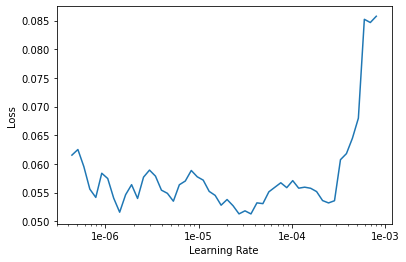

In [0]:
learn.recorder.plot()

## Interpretation

In [0]:
learn.load('22Apr-stage-4')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

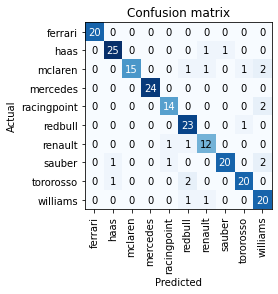

In [0]:
interp.plot_confusion_matrix()

In [0]:
losses, idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

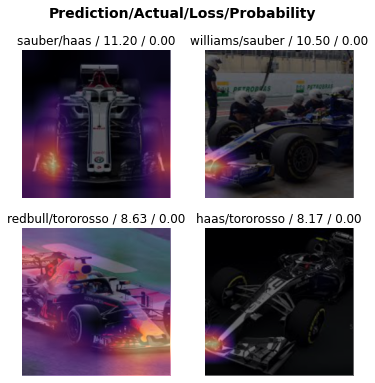

In [0]:
interp.plot_top_losses(4,heatmap=True,figsize=(6,6))

In [0]:
interp.most_confused(min_val=2)

[('mclaren', 'williams', 2),
 ('racingpoint', 'williams', 2),
 ('sauber', 'williams', 2),
 ('tororosso', 'redbull', 2)]

In [0]:
#print(path / 'models') #path os Posix path
#learn.export(path / 'models/f1cars_export.pkl')
learn.export(path/'22Apr_f1cars_export.pkl')

#download to local drive for use in webapp

End
